In [1]:
import csv
import time
import pickle
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

# hyperparameter optimization routines
from hyperopt import hp
from hyperopt import tpe
from hyperopt import fmin
from hyperopt import Trials
from hyperopt import STATUS_OK
from hyperopt.pyll.stochastic import sample

# persistence images routines
import PersistenceImages.persistence_images as pimgs

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os.path

from HyperoptUtils import *
from BoneData import *

## Persistence Images

In [5]:
# -------------------
# Perform a Bayesian optimization search across persistence images
bone_df = get_bone_data_df()
dgm_df = bone_df[['dgm']]
target_df = bone_df['trabnum']
scorer = make_scorer(mean_squared_error)
max_evals = 1000
cv=6

# precompute the persistence image region over the full dataset
birth_range = (0, 0.5)
pers_range = (0, 0.61)
max_death = 0.7

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])

param_space = {'estimator_params': 
                {
                'method': pipeline_ridge,
                'kwargs':  {
                            'ridge__normalize':False,
                            'ridge__fit_intercept':True,
                            'ridge__alpha':hp.loguniform('alphas', -10,6)
                            }
                },
                'dgm_vec_params':
                hp.choice('dgm_vec_params',
                [
                {
                'method': vec_dgm_by_per_images,
                'kwargs': {
                            'birth_range': birth_range,
                            'pers_range': pers_range,
                            'max_death': max_death,
                            'pixel_size': hp.uniform('pixel_size', 0.01, 0.1),
                            'weight_params': {'n': 1},
                            'kernel_params': {'sigma': hp.uniform('sigma', 0.005, 0.1)},
                            'do_plot': False
                            }
                },
                {
                'method': vec_dgm_by_per,
                'kwargs': {
                             'start': hp.quniform('start', 0, 150, 1),
                             'num_pairs': hp.quniform('num_pairs', 1, 150, 1), 
                             'per_only': hp.choice('per_only', [True, False])
                            }
                }
                ])
            }


# ---------------------------------
# create the objective function to minimize, passing in all fixed arguments
objective = lambda params: cv_objective(params,
                                        dgm_df=dgm_df,
                                        target_df=target_df, 
                                        scorer=scorer,
                                        cv=cv,
                                        verbose=True)


# continue parameterization run if already started
if os.path.isfile('data/complex_vec_dgm_bayes_trials.pickle'):
    with open('data/complex_vec_dgm_bayes_trials.pickle','rb') as f:
        bayes_trials = pickle.load(f)
else:
    bayes_trials = Trials()

# run the hyperparamter optimization
best = fmin(fn=objective, 
            space=param_space, 
            algo=tpe.suggest, 
            max_evals=max_evals, 
            trials=bayes_trials)

Vectorizing Diagrams                                  

Training and Testing Estimator                        

  0%|          | 0/1000 [00:00<?, ?it/s, best loss: ?]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                            

Training and Testing Estimator                                                  

  0%|          | 1/1000 [00:01<25:12,  1.51s/it, best loss: 0.06701929628692467]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.4s remaining:    1.4s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.4s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                            

  0%|          | 2/1000 [00:02<21:21,  1.28s/it, best loss: 0.06701929628692467]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.6s remaining:    0.6s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished



Training and Testing Estimator                                                  

Vectorizing Diagrams                                                              

  0%|          | 3/1000 [00:30<2:36:58,  9.45s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

  0%|          | 5/1000 [00:58<2:52:46, 10.42s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

  1%|          | 7/1000 [00:58<1:25:31,  5.17s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

  1%|          | 9/1000 [00:58<42:51,  2.59s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                  

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  1%|          | 11/1000 [01:26<1:55:28,  7.01s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  1%|          | 12/1000 [01:26<1:21:27,  4.95s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  1%|▏         | 14/1000 [01:52<2:12:18,  8.05s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  2%|▏         | 15/1000 [01:53<1:33:08,  5.67s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  2%|▏         | 16/1000 [02:21<3:26:23, 12.59s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  2%|▏         | 18/1000 [02:48<3:11:42, 11.71s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  2%|▏         | 20/1000 [03:15<3:06:57, 11.45s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  2%|▏         | 21/1000 [03:51<5:09:03, 18.94s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  2%|▏         | 22/1000 [04:22<6:06:42, 22.50s/it, best loss: 0.04460898800249503]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                

  2%|▏         | 23/1000 [04:51<6:39:27, 24.53s/it, best loss: 0.043543179205036094]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  2%|▏         | 24/1000 [05:21<7:04:30, 26.10s/it, best loss: 0.043543179205036094]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  2%|▎         | 25/1000 [05:54<7:37:17, 28.14s/it, best loss: 0.043006696950093154]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  3%|▎         | 26/1000 [06:33<8:30:15, 31.43s/it, best loss: 0.043006696950093154]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                 

  3%|▎         | 27/1000 [07:34<10:53:11, 40.28s/it, best loss: 0.043006696950093154]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

  3%|▎         | 28/1000 [08:15<10:56:35, 40.53s/it, best loss: 0.043006696950093154]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

  3%|▎         | 29/1000 [08:54<10:46:28, 39.95s/it, best loss: 0.041743380845379534]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

  3%|▎         | 30/1000 [09:33<10:42:30, 39.74s/it, best loss: 0.041743380845379534]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

  3%|▎         | 31/1000 [10:16<10:59:32, 40.84s/it, best loss: 0.041743380845379534]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

  3%|▎         | 32/1000 [11:13<12:15:26, 45.59s/it, best loss: 0.041743380845379534]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

  3%|▎         | 33/1000 [11:44<11:06:45, 41.37s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  3%|▎         | 34/1000 [12:20<10:36:20, 39.52s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  4%|▎         | 35/1000 [12:53<10:05:01, 37.62s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  4%|▎         | 36/1000 [13:23<9:28:00, 35.35s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  4%|▎         | 37/1000 [13:59<9:32:39, 35.68s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  4%|▍         | 38/1000 [14:34<9:24:47, 35.23s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  4%|▍         | 39/1000 [15:06<9:11:23, 34.43s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  4%|▍         | 40/1000 [15:47<9:41:40, 36.35s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                

  4%|▍         | 41/1000 [16:54<12:10:18, 45.69s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  4%|▍         | 42/1000 [17:32<11:28:35, 43.13s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

  4%|▍         | 44/1000 [17:59<7:09:02, 26.93s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  5%|▍         | 46/1000 [18:34<5:27:18, 20.59s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  5%|▍         | 48/1000 [19:08<4:32:39, 17.18s/it, best loss: 0.03953999452395323]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  5%|▍         | 49/1000 [19:36<5:25:44, 20.55s/it, best loss: 0.03856323686499037]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  5%|▌         | 51/1000 [20:06<4:16:26, 16.21s/it, best loss: 0.03856323686499037]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  5%|▌         | 52/1000 [20:33<5:09:01, 19.56s/it, best loss: 0.03856323686499037]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                

  5%|▌         | 54/1000 [21:00<4:01:05, 15.29s/it, best loss: 0.037286063575997626]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  6%|▌         | 56/1000 [21:00<1:59:00,  7.56s/it, best loss: 0.03231795375948029]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

  6%|▌         | 58/1000 [21:01<59:22,  3.78s/it, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  6%|▌         | 60/1000 [21:01<30:08,  1.92s/it, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  6%|▌         | 62/1000 [21:01<15:52,  1.02s/it, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  6%|▋         | 64/1000 [21:02<08:54,  1.75it/s, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  7%|▋         | 66/1000 [21:02<05:29,  2.83it/s, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  7%|▋         | 68/1000 [21:02<03:48,  4.09it/s, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  7%|▋         | 70/1000 [21:02<02:57,  5.23it/s, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  7%|▋         | 72/1000 [21:03<02:33,  6.03it/s, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  7%|▋         | 74/1000 [21:03<02:21,  6.53it/s, best loss: 0.02069367318183366]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  8%|▊         | 76/1000 [21:03<02:16,  6.77it/s, best loss: 0.02060442400796992]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  8%|▊         | 78/1000 [21:03<02:13,  6.90it/s, best loss: 0.02060442400796992]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  8%|▊         | 80/1000 [21:04<02:11,  6.97it/s, best loss: 0.02060442400796992]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  8%|▊         | 82/1000 [21:04<02:11,  6.97it/s, best loss: 0.02060442400796992]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

  8%|▊         | 84/1000 [21:04<02:12,  6.90it/s, best loss: 0.019086102170439042]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  9%|▊         | 86/1000 [21:05<02:12,  6.91it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  9%|▉         | 88/1000 [21:05<02:11,  6.93it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  9%|▉         | 90/1000 [21:05<02:14,  6.76it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  9%|▉         | 92/1000 [21:06<02:16,  6.67it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

  9%|▉         | 94/1000 [21:06<02:12,  6.82it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

 10%|▉         | 96/1000 [21:06<02:11,  6.88it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

 10%|▉         | 98/1000 [21:06<02:13,  6.77it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                   

Vectorizing Diagrams                                                             

Training and Testing Estimator                                                   

Vectorizing Diagrams                                                              

 10%|█         | 100/1000 [21:07<02:12,  6.82it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 10%|█         | 102/1000 [21:07<02:12,  6.79it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 10%|█         | 104/1000 [21:07<02:09,  6.94it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 11%|█         | 106/1000 [21:08<02:07,  7.00it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 11%|█         | 108/1000 [21:08<02:07,  6.98it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 11%|█         | 110/1000 [21:08<02:07,  6.95it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 11%|█         | 112/1000 [21:08<02:08,  6.92it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 11%|█▏        | 114/1000 [21:09<02:08,  6.91it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 12%|█▏        | 116/1000 [21:38<1:30:38,  6.15s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 12%|█▏        | 118/1000 [21:38<45:19,  3.08s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 12%|█▏        | 120/1000 [22:06<1:48:49,  7.42s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 12%|█▏        | 122/1000 [22:06<54:22,  3.72s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 12%|█▏        | 124/1000 [22:35<1:55:34,  7.92s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 13%|█▎        | 126/1000 [22:36<57:39,  3.96s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 13%|█▎        | 127/1000 [22:36<41:01,  2.82s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 13%|█▎        | 129/1000 [23:04<1:46:29,  7.34s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 13%|█▎        | 131/1000 [23:04<53:14,  3.68s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 13%|█▎        | 133/1000 [23:34<1:56:46,  8.08s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 14%|█▎        | 135/1000 [23:34<58:11,  4.04s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 14%|█▎        | 136/1000 [23:35<41:19,  2.87s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 14%|█▍        | 138/1000 [24:03<1:44:56,  7.30s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 14%|█▍        | 140/1000 [24:03<52:20,  3.65s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 14%|█▍        | 142/1000 [24:03<26:40,  1.86s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 14%|█▍        | 144/1000 [24:31<1:35:28,  6.69s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 15%|█▍        | 146/1000 [24:31<47:39,  3.35s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 15%|█▍        | 148/1000 [24:31<24:17,  1.71s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 15%|█▌        | 150/1000 [24:32<12:53,  1.10it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 15%|█▌        | 152/1000 [24:32<07:17,  1.94it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 15%|█▌        | 154/1000 [24:32<04:33,  3.10it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 16%|█▌        | 156/1000 [24:32<03:16,  4.30it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 16%|█▌        | 158/1000 [24:33<02:34,  5.45it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 16%|█▌        | 160/1000 [24:33<02:14,  6.25it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 16%|█▌        | 162/1000 [24:33<02:04,  6.75it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 16%|█▋        | 164/1000 [24:33<01:59,  6.99it/s, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 17%|█▋        | 166/1000 [25:01<1:21:32,  5.87s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 17%|█▋        | 168/1000 [25:01<40:54,  2.95s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 17%|█▋        | 169/1000 [25:01<29:09,  2.11s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 17%|█▋        | 171/1000 [25:30<1:36:40,  7.00s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 17%|█▋        | 173/1000 [25:30<48:14,  3.50s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 18%|█▊        | 175/1000 [25:30<24:35,  1.79s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 18%|█▊        | 177/1000 [26:10<2:05:51,  9.18s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 18%|█▊        | 179/1000 [26:10<1:02:30,  4.57s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 18%|█▊        | 181/1000 [26:10<31:32,  2.31s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 18%|█▊        | 183/1000 [26:40<1:40:11,  7.36s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 18%|█▊        | 185/1000 [26:40<49:58,  3.68s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 19%|█▊        | 187/1000 [26:40<25:24,  1.87s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 19%|█▉        | 189/1000 [27:10<1:36:16,  7.12s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 19%|█▉        | 191/1000 [27:10<48:07,  3.57s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 19%|█▉        | 193/1000 [27:11<24:37,  1.83s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 20%|█▉        | 195/1000 [27:45<1:50:26,  8.23s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 20%|█▉        | 197/1000 [27:46<55:04,  4.11s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 20%|█▉        | 199/1000 [27:46<27:59,  2.10s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 20%|██        | 201/1000 [28:18<1:43:01,  7.74s/it, best loss: 0.01874746117486862]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 20%|██        | 203/1000 [28:18<51:28,  3.88s/it, best loss: 0.01874746117486862]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 20%|██        | 205/1000 [28:19<26:18,  1.99s/it, best loss: 0.017284816596438896]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 21%|██        | 207/1000 [28:51<1:41:31,  7.68s/it, best loss: 0.017284816596438896]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 21%|██        | 209/1000 [28:51<50:40,  3.84s/it, best loss: 0.017284816596438896]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 21%|██        | 211/1000 [28:51<25:48,  1.96s/it, best loss: 0.017284816596438896]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 21%|██▏       | 213/1000 [29:35<2:14:38, 10.26s/it, best loss: 0.01689385315261639] 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 21%|██▏       | 214/1000 [29:36<1:34:45,  7.23s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 22%|██▏       | 216/1000 [29:36<47:25,  3.63s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 22%|██▏       | 218/1000 [29:36<24:12,  1.86s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 22%|██▏       | 220/1000 [30:10<1:43:31,  7.96s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 22%|██▏       | 222/1000 [30:10<51:42,  3.99s/it, best loss: 0.01689385315261639]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 22%|██▏       | 224/1000 [30:10<26:21,  2.04s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 23%|██▎       | 228/1000 [30:46<54:25,  4.23s/it, best loss: 0.01689385315261639]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 23%|██▎       | 229/1000 [30:46<38:41,  3.01s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

 23%|██▎       | 230/1000 [30:47<27:46,  2.16s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 23%|██▎       | 232/1000 [31:19<1:40:20,  7.84s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 23%|██▎       | 234/1000 [31:19<50:06,  3.93s/it, best loss: 0.01689385315261639]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 24%|██▎       | 236/1000 [31:19<25:36,  2.01s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 24%|██▍       | 238/1000 [31:53<1:41:59,  8.03s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 24%|██▍       | 240/1000 [31:53<50:58,  4.02s/it, best loss: 0.01689385315261639]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 24%|██▍       | 241/1000 [31:54<36:17,  2.87s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 24%|██▍       | 244/1000 [32:34<2:00:32,  9.57s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                

 25%|██▍       | 246/1000 [32:35<59:55,  4.77s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 25%|██▍       | 248/1000 [32:35<30:20,  2.42s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 25%|██▍       | 249/1000 [33:07<2:22:26, 11.38s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 25%|██▌       | 250/1000 [33:08<1:40:18,  8.03s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 25%|██▌       | 252/1000 [33:08<50:13,  4.03s/it, best loss: 0.01689385315261639]  

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 25%|██▌       | 253/1000 [33:08<35:52,  2.88s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

 25%|██▌       | 254/1000 [33:08<25:47,  2.07s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

 26%|██▌       | 255/1000 [33:59<3:28:16, 16.77s/it, best loss: 0.01689385315261639]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                      

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 26%|██▌       | 256/1000 [34:00<2:26:20, 11.80s/it, best loss: 0.015653419708089398]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 26%|██▌       | 257/1000 [34:00<1:42:58,  8.32s/it, best loss: 0.015653419708089398]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 26%|██▌       | 259/1000 [34:00<51:32,  4.17s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 26%|██▌       | 260/1000 [34:00<36:44,  2.98s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 26%|██▌       | 262/1000 [34:01<19:06,  1.55s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 26%|██▋       | 263/1000 [34:01<14:02,  1.14s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 26%|██▋       | 265/1000 [34:01<08:03,  1.52it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 27%|██▋       | 267/1000 [34:01<05:00,  2.44it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 27%|██▋       | 269/1000 [34:02<03:32,  3.43it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 27%|██▋       | 270/1000 [34:02<03:11,  3.80it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 27%|██▋       | 271/1000 [34:02<02:55,  4.15it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 27%|██▋       | 272/1000 [34:03<02:48,  4.32it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 27%|██▋       | 274/1000 [34:03<02:33,  4.74it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 28%|██▊       | 275/1000 [34:03<02:28,  4.89it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 28%|██▊       | 277/1000 [34:03<02:22,  5.06it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 28%|██▊       | 279/1000 [34:04<02:12,  5.44it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 28%|██▊       | 281/1000 [34:04<02:08,  5.59it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 28%|██▊       | 283/1000 [34:04<02:02,  5.85it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 28%|██▊       | 284/1000 [34:05<02:00,  5.93it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 29%|██▊       | 286/1000 [34:41<1:31:24,  7.68s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 29%|██▉       | 288/1000 [34:41<45:42,  3.85s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 29%|██▉       | 290/1000 [34:41<23:23,  1.98s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 29%|██▉       | 291/1000 [34:42<16:57,  1.43s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 29%|██▉       | 293/1000 [35:14<1:28:44,  7.53s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 30%|██▉       | 295/1000 [35:14<44:22,  3.78s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 30%|██▉       | 297/1000 [35:15<22:40,  1.94s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 30%|██▉       | 298/1000 [35:15<16:25,  1.40s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 30%|███       | 300/1000 [35:47<1:26:51,  7.44s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 30%|███       | 302/1000 [35:47<43:28,  3.74s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 30%|███       | 303/1000 [35:48<31:00,  2.67s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 30%|███       | 305/1000 [35:48<16:13,  1.40s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 31%|███       | 306/1000 [36:24<2:17:53, 11.92s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 31%|███       | 308/1000 [36:25<1:08:27,  5.94s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 31%|███       | 309/1000 [36:25<48:28,  4.21s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 31%|███       | 311/1000 [36:25<24:53,  2.17s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

 31%|███       | 312/1000 [36:25<18:05,  1.58s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 31%|███▏      | 314/1000 [37:02<1:37:49,  8.56s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 32%|███▏      | 316/1000 [37:03<48:46,  4.28s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 32%|███▏      | 318/1000 [37:03<24:46,  2.18s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 32%|███▏      | 319/1000 [37:03<17:52,  1.57s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 32%|███▏      | 321/1000 [37:38<1:31:38,  8.10s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 32%|███▏      | 323/1000 [37:38<45:43,  4.05s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 32%|███▎      | 325/1000 [37:39<23:17,  2.07s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 33%|███▎      | 326/1000 [37:39<16:52,  1.50s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 33%|███▎      | 328/1000 [38:16<1:35:09,  8.50s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 33%|███▎      | 330/1000 [38:16<47:25,  4.25s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 33%|███▎      | 331/1000 [38:16<33:42,  3.02s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 33%|███▎      | 333/1000 [38:17<17:29,  1.57s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 34%|███▎      | 335/1000 [38:51<1:29:28,  8.07s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 34%|███▎      | 337/1000 [38:52<44:39,  4.04s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 34%|███▍      | 338/1000 [38:52<31:45,  2.88s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 34%|███▍      | 340/1000 [38:52<16:30,  1.50s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 34%|███▍      | 342/1000 [39:24<1:20:54,  7.38s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 34%|███▍      | 344/1000 [39:24<40:28,  3.70s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 35%|███▍      | 346/1000 [39:24<20:41,  1.90s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 35%|███▍      | 347/1000 [39:25<15:02,  1.38s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 35%|███▍      | 349/1000 [40:05<1:40:37,  9.27s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 35%|███▌      | 351/1000 [40:06<50:05,  4.63s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 35%|███▌      | 353/1000 [40:06<25:24,  2.36s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 35%|███▌      | 354/1000 [40:06<18:19,  1.70s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 36%|███▌      | 356/1000 [40:38<1:20:07,  7.46s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 36%|███▌      | 358/1000 [40:38<40:03,  3.74s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 36%|███▌      | 360/1000 [40:39<20:33,  1.93s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 36%|███▌      | 362/1000 [40:39<10:57,  1.03s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 36%|███▋      | 364/1000 [41:11<1:16:07,  7.18s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 36%|███▋      | 365/1000 [41:11<53:43,  5.08s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 37%|███▋      | 367/1000 [41:11<27:11,  2.58s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 37%|███▋      | 369/1000 [41:11<14:11,  1.35s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 37%|███▋      | 371/1000 [41:44<1:17:59,  7.44s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 37%|███▋      | 373/1000 [41:44<39:00,  3.73s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 38%|███▊      | 375/1000 [41:44<19:57,  1.92s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 38%|███▊      | 376/1000 [41:45<14:30,  1.39s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 38%|███▊      | 378/1000 [42:16<1:16:08,  7.34s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 38%|███▊      | 380/1000 [42:17<38:06,  3.69s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 38%|███▊      | 382/1000 [42:17<19:30,  1.89s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 38%|███▊      | 383/1000 [42:17<14:09,  1.38s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 38%|███▊      | 385/1000 [42:49<1:15:47,  7.40s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 39%|███▊      | 387/1000 [42:49<37:54,  3.71s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 39%|███▉      | 388/1000 [42:50<27:07,  2.66s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 39%|███▉      | 390/1000 [42:50<14:10,  1.39s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 39%|███▉      | 392/1000 [43:23<1:17:22,  7.63s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 39%|███▉      | 394/1000 [43:23<38:41,  3.83s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 40%|███▉      | 396/1000 [43:24<19:49,  1.97s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 40%|███▉      | 397/1000 [43:24<14:25,  1.44s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 40%|███▉      | 398/1000 [43:55<1:44:25, 10.41s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 40%|████      | 400/1000 [43:56<51:55,  5.19s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 40%|████      | 402/1000 [43:56<26:15,  2.64s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 40%|████      | 403/1000 [43:56<18:52,  1.90s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 40%|████      | 405/1000 [43:56<10:07,  1.02s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 41%|████      | 407/1000 [43:57<05:51,  1.69it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 41%|████      | 409/1000 [43:57<03:43,  2.64it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 41%|████      | 411/1000 [43:57<02:41,  3.64it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 41%|████▏     | 413/1000 [43:58<02:11,  4.47it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 42%|████▏     | 415/1000 [43:58<01:56,  5.04it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 42%|████▏     | 417/1000 [43:59<01:47,  5.40it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 42%|████▏     | 419/1000 [43:59<01:43,  5.61it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 42%|████▏     | 420/1000 [43:59<01:42,  5.63it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 42%|████▏     | 422/1000 [43:59<01:41,  5.67it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 42%|████▏     | 424/1000 [44:00<01:40,  5.73it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 43%|████▎     | 426/1000 [44:00<01:39,  5.79it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 43%|████▎     | 428/1000 [44:00<01:40,  5.66it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 43%|████▎     | 429/1000 [44:01<01:42,  5.58it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 43%|████▎     | 431/1000 [44:01<01:42,  5.56it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

                                                                                   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 43%|████▎     | 433/1000 [44:02<01:46,  5.32it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

 43%|████▎     | 434/1000 [44:02<01:47,  5.25it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 44%|████▎     | 436/1000 [44:37<1:10:49,  7.54s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 44%|████▍     | 438/1000 [44:37<35:25,  3.78s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 44%|████▍     | 440/1000 [44:38<18:07,  1.94s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 44%|████▍     | 442/1000 [44:38<09:41,  1.04s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

 44%|████▍     | 443/1000 [45:16<1:52:15, 12.09s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 44%|████▍     | 445/1000 [45:16<55:44,  6.03s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 45%|████▍     | 447/1000 [45:17<28:04,  3.05s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 45%|████▍     | 449/1000 [45:17<14:32,  1.58s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 45%|████▌     | 450/1000 [45:17<10:39,  1.16s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 45%|████▌     | 452/1000 [45:52<1:12:33,  7.95s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 45%|████▌     | 454/1000 [45:53<36:15,  3.98s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 46%|████▌     | 456/1000 [45:53<18:31,  2.04s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 46%|████▌     | 458/1000 [45:53<09:51,  1.09s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 46%|████▌     | 460/1000 [46:25<1:05:05,  7.23s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 46%|████▌     | 462/1000 [46:25<32:35,  3.64s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 46%|████▋     | 464/1000 [46:26<16:44,  1.87s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 47%|████▋     | 466/1000 [46:26<08:58,  1.01s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 47%|████▋     | 468/1000 [46:58<1:03:22,  7.15s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 47%|████▋     | 470/1000 [46:58<31:43,  3.59s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 47%|████▋     | 472/1000 [46:59<16:17,  1.85s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 47%|████▋     | 474/1000 [46:59<08:45,  1.00it/s, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 48%|████▊     | 476/1000 [47:31<1:02:51,  7.20s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 48%|████▊     | 478/1000 [47:31<31:28,  3.62s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 48%|████▊     | 479/1000 [47:31<22:27,  2.59s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 48%|████▊     | 481/1000 [47:32<11:46,  1.36s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 48%|████▊     | 482/1000 [47:32<08:41,  1.01s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 48%|████▊     | 484/1000 [48:06<1:06:08,  7.69s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 49%|████▊     | 486/1000 [48:06<33:03,  3.86s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 49%|████▉     | 488/1000 [48:07<16:54,  1.98s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 49%|████▉     | 490/1000 [48:07<09:01,  1.06s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 49%|████▉     | 492/1000 [48:42<1:06:53,  7.90s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 49%|████▉     | 494/1000 [48:42<33:24,  3.96s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 50%|████▉     | 495/1000 [48:43<23:46,  2.83s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 50%|████▉     | 497/1000 [48:43<12:23,  1.48s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 50%|████▉     | 498/1000 [48:43<09:06,  1.09s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

 50%|████▉     | 499/1000 [49:15<1:25:58, 10.30s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 50%|█████     | 501/1000 [49:15<42:45,  5.14s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 50%|█████     | 503/1000 [49:16<21:36,  2.61s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 50%|█████     | 505/1000 [49:16<11:17,  1.37s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 51%|█████     | 506/1000 [49:16<08:19,  1.01s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 51%|█████     | 508/1000 [49:49<1:00:27,  7.37s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                     

 51%|█████     | 510/1000 [49:49<30:14,  3.70s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 51%|█████     | 512/1000 [49:50<15:30,  1.91s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 51%|█████▏    | 513/1000 [49:50<11:17,  1.39s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

 51%|█████▏    | 514/1000 [49:50<08:19,  1.03s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 52%|█████▏    | 515/1000 [50:33<1:50:25, 13.66s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 52%|█████▏    | 517/1000 [50:34<54:37,  6.79s/it, best loss: 0.014054447468466756]  

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 52%|█████▏    | 518/1000 [50:34<38:35,  4.80s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 52%|█████▏    | 520/1000 [50:34<19:35,  2.45s/it, best loss: 0.014054447468466756]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 52%|█████▏    | 522/1000 [50:34<10:20,  1.30s/it, best loss: 0.013638228445935234]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 52%|█████▏    | 523/1000 [50:35<07:39,  1.04it/s, best loss: 0.013638228445935234]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 52%|█████▎    | 525/1000 [51:07<57:08,  7.22s/it, best loss: 0.013638228445935234]  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 53%|█████▎    | 526/1000 [51:07<40:22,  5.11s/it, best loss: 0.013638228445935234]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 53%|█████▎    | 528/1000 [51:07<20:25,  2.60s/it, best loss: 0.013638228445935234]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 53%|█████▎    | 530/1000 [51:08<10:40,  1.36s/it, best loss: 0.013638228445935234]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                               

 53%|█████▎    | 531/1000 [51:08<07:53,  1.01s/it, best loss: 0.013638228445935234]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 53%|█████▎    | 533/1000 [51:40<55:50,  7.17s/it, best loss: 0.01357899646363752]   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 54%|█████▎    | 535/1000 [51:40<27:56,  3.61s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 54%|█████▎    | 537/1000 [51:40<14:20,  1.86s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 54%|█████▍    | 539/1000 [51:41<07:41,  1.00s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 54%|█████▍    | 540/1000 [52:30<1:58:29, 15.45s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 54%|█████▍    | 542/1000 [52:30<58:31,  7.67s/it, best loss: 0.01357899646363752]  

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 54%|█████▍    | 544/1000 [52:31<29:15,  3.85s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 55%|█████▍    | 545/1000 [52:31<20:50,  2.75s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 55%|█████▍    | 547/1000 [52:31<10:51,  1.44s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 55%|█████▍    | 548/1000 [53:08<1:29:53, 11.93s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 55%|█████▌    | 550/1000 [53:08<44:33,  5.94s/it, best loss: 0.01357899646363752]  

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 55%|█████▌    | 551/1000 [53:08<31:34,  4.22s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 55%|█████▌    | 553/1000 [53:08<16:05,  2.16s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 55%|█████▌    | 554/1000 [53:09<11:39,  1.57s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

 56%|█████▌    | 555/1000 [53:09<08:33,  1.15s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 56%|█████▌    | 556/1000 [53:46<1:27:52, 11.87s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 56%|█████▌    | 558/1000 [53:46<43:32,  5.91s/it, best loss: 0.01357899646363752]  

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 56%|█████▌    | 559/1000 [53:46<30:48,  4.19s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 56%|█████▌    | 561/1000 [53:47<15:44,  2.15s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 56%|█████▌    | 562/1000 [53:47<11:23,  1.56s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 56%|█████▋    | 564/1000 [53:47<06:14,  1.16it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 56%|█████▋    | 565/1000 [54:20<1:14:59, 10.34s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

 57%|█████▋    | 567/1000 [54:20<37:15,  5.16s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 57%|█████▋    | 568/1000 [54:20<26:25,  3.67s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 57%|█████▋    | 570/1000 [54:21<13:34,  1.89s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 57%|█████▋    | 571/1000 [54:21<09:52,  1.38s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

 57%|█████▋    | 572/1000 [54:21<07:17,  1.02s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 57%|█████▋    | 573/1000 [55:01<1:30:18, 12.69s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 57%|█████▊    | 575/1000 [55:01<44:43,  6.31s/it, best loss: 0.01357899646363752]  

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 576/1000 [55:02<31:37,  4.47s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 578/1000 [55:02<16:05,  2.29s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 579/1000 [55:02<11:37,  1.66s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 581/1000 [55:02<06:21,  1.10it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 582/1000 [55:03<04:49,  1.45it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 584/1000 [55:03<02:59,  2.31it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 58%|█████▊    | 585/1000 [55:03<02:28,  2.79it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 59%|█████▊    | 587/1000 [55:03<01:51,  3.70it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 59%|█████▉    | 588/1000 [55:04<01:41,  4.07it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 59%|█████▉    | 590/1000 [55:04<01:27,  4.67it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 59%|█████▉    | 591/1000 [55:04<01:24,  4.87it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 59%|█████▉    | 593/1000 [55:05<01:19,  5.14it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 59%|█████▉    | 594/1000 [55:05<01:18,  5.17it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|█████▉    | 596/1000 [55:05<01:17,  5.24it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|█████▉    | 597/1000 [55:05<01:16,  5.24it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|█████▉    | 599/1000 [55:06<01:16,  5.24it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|██████    | 600/1000 [55:06<01:18,  5.12it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|██████    | 602/1000 [55:06<01:15,  5.25it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|██████    | 603/1000 [55:07<01:15,  5.26it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 60%|██████    | 605/1000 [55:07<01:14,  5.33it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 61%|██████    | 607/1000 [55:07<01:12,  5.40it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 61%|██████    | 608/1000 [55:08<01:12,  5.41it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 61%|██████    | 610/1000 [55:08<01:13,  5.28it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 61%|██████    | 611/1000 [55:08<01:12,  5.33it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 61%|██████    | 612/1000 [55:08<01:16,  5.09it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 61%|██████▏   | 614/1000 [55:09<01:14,  5.20it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 62%|██████▏   | 615/1000 [55:09<01:13,  5.22it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 62%|██████▏   | 617/1000 [55:09<01:12,  5.28it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 62%|██████▏   | 618/1000 [55:41<1:01:21,  9.64s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

 62%|██████▏   | 619/1000 [55:41<43:11,  6.80s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 62%|██████▏   | 621/1000 [55:41<21:42,  3.44s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 62%|██████▏   | 622/1000 [55:42<15:32,  2.47s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 62%|██████▏   | 624/1000 [55:42<08:11,  1.31s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 62%|██████▎   | 625/1000 [55:42<06:04,  1.03it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 63%|██████▎   | 626/1000 [55:43<04:38,  1.34it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

 63%|██████▎   | 627/1000 [55:43<03:36,  1.73it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 63%|██████▎   | 628/1000 [56:14<1:00:26,  9.75s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

 63%|██████▎   | 630/1000 [56:14<30:03,  4.88s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 63%|██████▎   | 631/1000 [56:14<21:20,  3.47s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 63%|██████▎   | 633/1000 [56:15<10:58,  1.80s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 63%|██████▎   | 634/1000 [56:15<08:00,  1.31s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 64%|██████▎   | 635/1000 [56:46<1:02:59, 10.36s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

 64%|██████▎   | 637/1000 [56:47<31:17,  5.17s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 64%|██████▍   | 638/1000 [56:47<22:10,  3.68s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 64%|██████▍   | 640/1000 [56:47<11:23,  1.90s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 64%|██████▍   | 641/1000 [56:48<08:16,  1.38s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 64%|██████▍   | 643/1000 [56:48<04:36,  1.29it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 64%|██████▍   | 644/1000 [56:48<03:33,  1.67it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 64%|██████▍   | 645/1000 [57:20<58:23,  9.87s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 65%|██████▍   | 647/1000 [57:20<29:00,  4.93s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 65%|██████▍   | 648/1000 [57:20<20:35,  3.51s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 65%|██████▍   | 649/1000 [57:20<14:44,  2.52s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 65%|██████▌   | 651/1000 [57:21<07:44,  1.33s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 65%|██████▌   | 652/1000 [57:21<05:44,  1.01it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

 65%|██████▌   | 653/1000 [57:21<04:21,  1.33it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 65%|██████▌   | 654/1000 [57:53<57:59, 10.06s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 66%|██████▌   | 656/1000 [57:53<28:47,  5.02s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 66%|██████▌   | 658/1000 [57:54<14:34,  2.56s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 66%|██████▌   | 659/1000 [57:54<10:29,  1.85s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 66%|██████▌   | 661/1000 [57:54<05:38,  1.00it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 66%|██████▌   | 662/1000 [57:54<04:15,  1.32it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                                

Training and Testing Estimator                                                      

 66%|██████▋   | 663/1000 [58:30<1:03:11, 11.25s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                

Training and Testing Estimator                                                    

 66%|██████▋   | 665/1000 [58:30<31:19,  5.61s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 67%|██████▋   | 666/1000 [58:31<22:10,  3.98s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 67%|██████▋   | 667/1000 [58:31<15:47,  2.85s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 67%|██████▋   | 668/1000 [58:31<11:23,  2.06s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 67%|██████▋   | 670/1000 [58:31<06:04,  1.10s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

 67%|██████▋   | 671/1000 [58:32<04:33,  1.20it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 67%|██████▋   | 672/1000 [59:03<53:50,  9.85s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 67%|██████▋   | 674/1000 [59:03<26:44,  4.92s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 675/1000 [59:03<18:58,  3.50s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 677/1000 [59:03<09:45,  1.81s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 678/1000 [59:04<07:07,  1.33s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 680/1000 [59:04<03:59,  1.34it/s, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 681/1000 [59:36<52:53,  9.95s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 683/1000 [59:36<26:15,  4.97s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 68%|██████▊   | 684/1000 [59:36<18:37,  3.54s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

 69%|██████▊   | 686/1000 [59:36<09:35,  1.83s/it, best loss: 0.01357899646363752]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                              

Training and Testing Estimator                                                    

Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 69%|██████▊   | 687/1000 [59:37<06:59,  1.34s/it, best loss: 0.013204596596286733]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

 69%|██████▉   | 689/1000 [59:37<03:54,  1.33it/s, best loss: 0.013204596596286733]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                               

Training and Testing Estimator                                                     

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 69%|██████▉   | 690/1000 [1:00:08<50:54,  9.85s/it, best loss: 0.013204596596286733]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 69%|██████▉   | 692/1000 [1:00:08<25:16,  4.93s/it, best loss: 0.013204596596286733]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 69%|██████▉   | 693/1000 [1:00:09<17:56,  3.51s/it, best loss: 0.013204596596286733]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 69%|██████▉   | 694/1000 [1:00:09<12:49,  2.51s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|██████▉   | 695/1000 [1:00:09<09:15,  1.82s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|██████▉   | 696/1000 [1:00:09<06:46,  1.34s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|██████▉   | 697/1000 [1:00:10<05:01,  1.00it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|██████▉   | 698/1000 [1:00:10<03:48,  1.32it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

 70%|██████▉   | 699/1000 [1:00:10<02:58,  1.69it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|███████   | 701/1000 [1:00:45<38:04,  7.64s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|███████   | 702/1000 [1:00:45<26:51,  5.41s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|███████   | 703/1000 [1:00:45<19:03,  3.85s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|███████   | 704/1000 [1:00:46<13:35,  2.76s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 70%|███████   | 705/1000 [1:00:46<09:46,  1.99s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 71%|███████   | 706/1000 [1:00:46<07:07,  1.45s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

 71%|███████   | 707/1000 [1:00:46<05:15,  1.08s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                   

Training and Testing Estimator                                                         

 71%|███████   | 708/1000 [1:01:28<1:05:09, 13.39s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                   

 71%|███████   | 709/1000 [1:01:28<45:44,  9.43s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 71%|███████   | 710/1000 [1:01:29<32:13,  6.67s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 71%|███████   | 711/1000 [1:01:29<22:46,  4.73s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 71%|███████   | 712/1000 [1:01:29<16:11,  3.37s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 71%|███████▏  | 713/1000 [1:01:29<11:35,  2.42s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 71%|███████▏  | 714/1000 [1:01:29<08:22,  1.76s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 72%|███████▏  | 715/1000 [1:01:30<06:08,  1.29s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 72%|███████▏  | 716/1000 [1:01:30<04:35,  1.03it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                   

 72%|███████▏  | 717/1000 [1:02:28<1:25:17, 18.08s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                         

Vectorizing Diagrams                                                                   

 72%|███████▏  | 718/1000 [1:02:28<59:47, 12.72s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 72%|███████▏  | 719/1000 [1:02:28<42:00,  8.97s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 72%|███████▏  | 720/1000 [1:02:28<29:35,  6.34s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 72%|███████▏  | 721/1000 [1:02:29<20:55,  4.50s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator

Vectorizing Diagrams                                                                 

 72%|███████▏  | 723/1000 [1:02:29<10:40,  2.31s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 72%|███████▏  | 724/1000 [1:02:29<07:45,  1.69s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 72%|███████▎  | 725/1000 [1:02:30<05:41,  1.24s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 73%|███████▎  | 726/1000 [1:02:30<04:15,  1.07it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 73%|███████▎  | 727/1000 [1:03:05<51:21, 11.29s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 73%|███████▎  | 728/1000 [1:03:06<36:05,  7.96s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 73%|███████▎  | 729/1000 [1:03:06<25:27,  5.64s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 73%|███████▎  | 730/1000 [1:03:06<18:03,  4.01s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 73%|███████▎  | 731/1000 [1:03:06<12:54,  2.88s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 73%|███████▎  | 732/1000 [1:03:06<09:17,  2.08s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 73%|███████▎  | 733/1000 [1:03:06<06:46,  1.52s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

 74%|███████▎  | 735/1000 [1:03:07<03:45,  1.17it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▎  | 736/1000 [1:03:47<54:57, 12.49s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▎  | 737/1000 [1:03:47<38:36,  8.81s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 738/1000 [1:03:47<27:11,  6.23s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 739/1000 [1:03:47<19:13,  4.42s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 740/1000 [1:03:47<13:40,  3.16s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 741/1000 [1:03:48<09:48,  2.27s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 742/1000 [1:03:48<07:07,  1.66s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 743/1000 [1:03:48<05:15,  1.23s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 74%|███████▍  | 744/1000 [1:03:48<03:57,  1.08it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 74%|███████▍  | 745/1000 [1:04:20<43:40, 10.28s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 75%|███████▍  | 746/1000 [1:04:21<30:42,  7.25s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

 75%|███████▍  | 747/1000 [1:04:21<21:40,  5.14s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 75%|███████▍  | 748/1000 [1:04:21<15:22,  3.66s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 75%|███████▍  | 749/1000 [1:04:21<10:58,  2.62s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 75%|███████▌  | 750/1000 [1:04:21<07:55,  1.90s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 75%|███████▌  | 751/1000 [1:04:22<05:48,  1.40s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 75%|███████▌  | 752/1000 [1:04:22<04:20,  1.05s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 75%|███████▌  | 753/1000 [1:04:22<03:17,  1.25it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 75%|███████▌  | 754/1000 [1:04:53<40:34,  9.90s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 76%|███████▌  | 755/1000 [1:04:54<28:32,  6.99s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 76%|███████▌  | 756/1000 [1:04:54<20:09,  4.96s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 76%|███████▌  | 757/1000 [1:04:54<14:18,  3.53s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 76%|███████▌  | 758/1000 [1:04:54<10:14,  2.54s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 76%|███████▌  | 759/1000 [1:04:54<07:23,  1.84s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 76%|███████▌  | 760/1000 [1:04:55<05:25,  1.36s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 76%|███████▌  | 761/1000 [1:04:55<04:02,  1.02s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 76%|███████▌  | 762/1000 [1:04:55<03:04,  1.29it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 76%|███████▋  | 763/1000 [1:05:26<38:37,  9.78s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 76%|███████▋  | 764/1000 [1:05:26<27:09,  6.90s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 76%|███████▋  | 765/1000 [1:05:26<19:09,  4.89s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 766/1000 [1:05:26<13:36,  3.49s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 767/1000 [1:05:27<09:42,  2.50s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 769/1000 [1:05:27<05:06,  1.33s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 770/1000 [1:05:27<03:47,  1.01it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 77%|███████▋  | 771/1000 [1:05:27<02:51,  1.33it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 772/1000 [1:06:00<39:18, 10.34s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 773/1000 [1:06:00<27:37,  7.30s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 77%|███████▋  | 774/1000 [1:06:01<19:29,  5.17s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 78%|███████▊  | 775/1000 [1:06:01<13:48,  3.68s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 776/1000 [1:06:01<09:53,  2.65s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 777/1000 [1:06:01<07:08,  1.92s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 778/1000 [1:06:01<05:13,  1.41s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 779/1000 [1:06:02<03:53,  1.06s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 780/1000 [1:06:02<02:58,  1.24it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 781/1000 [1:06:49<53:43, 14.72s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 782/1000 [1:06:49<37:39, 10.36s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 783/1000 [1:06:49<26:27,  7.32s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 784/1000 [1:06:50<18:40,  5.19s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 78%|███████▊  | 785/1000 [1:06:50<13:15,  3.70s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▊  | 786/1000 [1:06:50<09:27,  2.65s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▊  | 787/1000 [1:06:50<06:48,  1.92s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▉  | 788/1000 [1:06:50<04:58,  1.41s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▉  | 789/1000 [1:06:51<03:40,  1.05s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▉  | 790/1000 [1:06:51<02:46,  1.26it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▉  | 791/1000 [1:06:51<02:10,  1.60it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

 79%|███████▉  | 793/1000 [1:06:52<01:25,  2.42it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 79%|███████▉  | 794/1000 [1:06:52<01:12,  2.84it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|███████▉  | 795/1000 [1:06:52<01:03,  3.24it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|███████▉  | 796/1000 [1:06:52<00:56,  3.58it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|███████▉  | 797/1000 [1:06:52<00:53,  3.83it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|███████▉  | 798/1000 [1:06:53<00:49,  4.04it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|███████▉  | 799/1000 [1:06:53<00:48,  4.17it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|████████  | 800/1000 [1:06:53<00:46,  4.33it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator

Vectorizing Diagrams                                                                 

 80%|████████  | 802/1000 [1:06:53<00:43,  4.52it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|████████  | 803/1000 [1:06:54<00:42,  4.62it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|████████  | 804/1000 [1:06:54<00:42,  4.64it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 80%|████████  | 805/1000 [1:06:54<00:42,  4.64it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 806/1000 [1:06:54<00:41,  4.67it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 807/1000 [1:06:55<00:41,  4.62it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 808/1000 [1:06:55<00:41,  4.61it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 809/1000 [1:06:55<00:41,  4.65it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 810/1000 [1:06:55<00:41,  4.57it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 811/1000 [1:06:55<00:41,  4.61it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████  | 812/1000 [1:06:56<00:40,  4.67it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████▏ | 813/1000 [1:06:56<00:39,  4.70it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 81%|████████▏ | 814/1000 [1:06:56<00:39,  4.67it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 815/1000 [1:06:56<00:39,  4.67it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 816/1000 [1:06:56<00:40,  4.56it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 817/1000 [1:06:57<00:40,  4.50it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 818/1000 [1:06:57<00:41,  4.43it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 819/1000 [1:06:57<00:39,  4.54it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 820/1000 [1:06:57<00:39,  4.61it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 821/1000 [1:06:58<00:38,  4.64it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 822/1000 [1:06:58<00:38,  4.64it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 823/1000 [1:06:58<00:38,  4.64it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▏ | 824/1000 [1:06:58<00:38,  4.63it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 82%|████████▎ | 825/1000 [1:06:58<00:37,  4.65it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 826/1000 [1:06:59<00:37,  4.65it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 827/1000 [1:06:59<00:37,  4.67it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 828/1000 [1:06:59<00:38,  4.48it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 829/1000 [1:06:59<00:37,  4.56it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 830/1000 [1:07:00<00:36,  4.63it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 831/1000 [1:07:00<00:36,  4.65it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 832/1000 [1:07:00<00:36,  4.62it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 833/1000 [1:07:00<00:36,  4.63it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 83%|████████▎ | 834/1000 [1:07:32<26:58,  9.75s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▎ | 835/1000 [1:07:32<18:56,  6.89s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▎ | 836/1000 [1:07:33<13:21,  4.88s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▎ | 837/1000 [1:07:33<09:27,  3.48s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 838/1000 [1:07:33<06:45,  2.50s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 839/1000 [1:07:33<04:52,  1.82s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 840/1000 [1:07:33<03:33,  1.33s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 841/1000 [1:07:34<02:38,  1.00it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 842/1000 [1:07:34<02:00,  1.31it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 843/1000 [1:07:34<01:33,  1.67it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 844/1000 [1:08:09<28:22, 10.91s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 84%|████████▍ | 845/1000 [1:08:09<19:53,  7.70s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▍ | 846/1000 [1:08:09<14:00,  5.46s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▍ | 847/1000 [1:08:10<09:54,  3.88s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▍ | 848/1000 [1:08:10<07:02,  2.78s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▍ | 849/1000 [1:08:10<05:03,  2.01s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▌ | 850/1000 [1:08:10<03:40,  1.47s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▌ | 851/1000 [1:08:11<02:43,  1.09s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▌ | 852/1000 [1:08:11<02:02,  1.21it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▌ | 853/1000 [1:08:11<01:34,  1.55it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 85%|████████▌ | 854/1000 [1:08:46<26:52, 11.04s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 855/1000 [1:08:46<18:49,  7.79s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 856/1000 [1:08:47<13:14,  5.52s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 857/1000 [1:08:47<09:21,  3.93s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 858/1000 [1:08:47<06:39,  2.81s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 859/1000 [1:08:47<04:46,  2.03s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 860/1000 [1:08:48<03:28,  1.49s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 861/1000 [1:08:48<02:33,  1.10s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▌ | 862/1000 [1:08:48<01:55,  1.19it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▋ | 863/1000 [1:08:48<01:28,  1.54it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▋ | 864/1000 [1:09:24<25:41, 11.34s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 86%|████████▋ | 865/1000 [1:09:25<18:00,  8.00s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 866/1000 [1:09:25<12:40,  5.68s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 867/1000 [1:09:25<08:57,  4.04s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 868/1000 [1:09:25<06:21,  2.89s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 869/1000 [1:09:26<04:33,  2.09s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 870/1000 [1:09:26<03:18,  1.53s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 871/1000 [1:09:26<02:26,  1.13s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 872/1000 [1:09:26<01:49,  1.16it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 873/1000 [1:09:26<01:24,  1.50it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 87%|████████▋ | 874/1000 [1:09:59<21:12, 10.10s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 875/1000 [1:09:59<14:51,  7.13s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 876/1000 [1:09:59<10:27,  5.06s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator

Vectorizing Diagrams                                                                 

 88%|████████▊ | 878/1000 [1:09:59<05:15,  2.59s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 879/1000 [1:10:00<03:47,  1.88s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 880/1000 [1:10:00<02:46,  1.39s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 881/1000 [1:10:00<02:03,  1.04s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 882/1000 [1:10:00<01:33,  1.26it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 883/1000 [1:10:01<01:12,  1.60it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 884/1000 [1:10:39<22:52, 11.84s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 88%|████████▊ | 885/1000 [1:10:39<16:00,  8.35s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▊ | 886/1000 [1:10:39<11:13,  5.91s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▊ | 887/1000 [1:10:39<07:54,  4.20s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 888/1000 [1:10:39<05:36,  3.01s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 889/1000 [1:10:40<04:01,  2.17s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 890/1000 [1:10:40<02:54,  1.59s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 891/1000 [1:10:40<02:08,  1.18s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 892/1000 [1:10:40<01:36,  1.12it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 893/1000 [1:10:40<01:13,  1.45it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 89%|████████▉ | 894/1000 [1:11:13<17:56, 10.15s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|████████▉ | 895/1000 [1:11:13<12:32,  7.17s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|████████▉ | 896/1000 [1:11:13<08:48,  5.09s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|████████▉ | 897/1000 [1:11:13<06:13,  3.63s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|████████▉ | 898/1000 [1:11:14<04:26,  2.61s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|████████▉ | 899/1000 [1:11:14<03:11,  1.89s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|█████████ | 900/1000 [1:11:14<02:19,  1.39s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|█████████ | 901/1000 [1:11:14<01:42,  1.04s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|█████████ | 902/1000 [1:11:15<01:17,  1.26it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|█████████ | 903/1000 [1:11:15<00:59,  1.62it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|█████████ | 904/1000 [1:11:46<15:48,  9.88s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 90%|█████████ | 905/1000 [1:11:46<11:03,  6.99s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 906/1000 [1:11:47<07:45,  4.95s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 907/1000 [1:11:47<05:28,  3.54s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 908/1000 [1:11:47<03:53,  2.54s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 909/1000 [1:11:47<02:48,  1.85s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 910/1000 [1:11:48<02:02,  1.37s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 911/1000 [1:11:48<01:32,  1.04s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████ | 912/1000 [1:11:48<01:10,  1.25it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████▏| 913/1000 [1:11:48<00:54,  1.59it/s, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 91%|█████████▏| 914/1000 [1:12:20<14:07,  9.85s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 915/1000 [1:12:20<09:51,  6.96s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 916/1000 [1:12:20<06:54,  4.94s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 917/1000 [1:12:20<04:52,  3.52s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 918/1000 [1:12:21<03:27,  2.53s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 919/1000 [1:12:21<02:28,  1.84s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 920/1000 [1:12:21<01:47,  1.35s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 921/1000 [1:12:21<01:19,  1.01s/it, best loss: 0.011944523320308426]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 922/1000 [1:12:21<01:00,  1.29it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 923/1000 [1:12:22<00:46,  1.64it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▏| 924/1000 [1:12:22<00:38,  1.99it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 92%|█████████▎| 925/1000 [1:12:54<12:18,  9.85s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 926/1000 [1:12:54<08:34,  6.96s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 927/1000 [1:12:54<06:00,  4.94s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 928/1000 [1:12:54<04:13,  3.52s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 929/1000 [1:12:54<02:59,  2.53s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 930/1000 [1:12:55<02:08,  1.83s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 931/1000 [1:12:55<01:33,  1.35s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 932/1000 [1:12:55<01:09,  1.02s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 933/1000 [1:12:55<00:52,  1.27it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 93%|█████████▎| 934/1000 [1:12:56<00:40,  1.63it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▎| 935/1000 [1:13:27<10:41,  9.88s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▎| 936/1000 [1:13:27<07:26,  6.98s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▎| 937/1000 [1:13:27<05:11,  4.95s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 938/1000 [1:13:28<03:38,  3.53s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 939/1000 [1:13:28<02:35,  2.54s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 940/1000 [1:13:28<01:50,  1.84s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 941/1000 [1:13:28<01:20,  1.36s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 942/1000 [1:13:29<00:59,  1.02s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 943/1000 [1:13:29<00:44,  1.28it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 94%|█████████▍| 944/1000 [1:13:29<00:34,  1.62it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 94%|█████████▍| 945/1000 [1:14:00<08:53,  9.70s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 95%|█████████▍| 947/1000 [1:14:00<04:17,  4.85s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 95%|█████████▍| 948/1000 [1:14:01<02:59,  3.45s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 95%|█████████▌| 950/1000 [1:14:01<01:29,  1.79s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 95%|█████████▌| 951/1000 [1:14:01<01:04,  1.31s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 95%|█████████▌| 952/1000 [1:14:01<00:46,  1.03it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 95%|█████████▌| 953/1000 [1:14:02<00:35,  1.33it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 95%|█████████▌| 954/1000 [1:14:02<00:27,  1.68it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▌| 955/1000 [1:14:33<07:13,  9.63s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▌| 957/1000 [1:14:33<03:27,  4.82s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▌| 958/1000 [1:14:33<02:24,  3.43s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▌| 960/1000 [1:14:33<01:11,  1.78s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▌| 961/1000 [1:14:34<00:50,  1.30s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▋| 963/1000 [1:14:34<00:27,  1.36it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 96%|█████████▋| 964/1000 [1:14:34<00:20,  1.74it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 96%|█████████▋| 965/1000 [1:14:34<00:16,  2.18it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 97%|█████████▋| 966/1000 [1:15:01<04:45,  8.40s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 97%|█████████▋| 968/1000 [1:15:02<02:14,  4.21s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 97%|█████████▋| 969/1000 [1:15:02<01:33,  3.01s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 97%|█████████▋| 971/1000 [1:15:02<00:45,  1.57s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 97%|█████████▋| 972/1000 [1:15:03<00:32,  1.16s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 97%|█████████▋| 973/1000 [1:15:03<00:23,  1.14it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 975/1000 [1:15:03<00:13,  1.90it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 976/1000 [1:15:33<03:43,  9.32s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 977/1000 [1:15:33<02:31,  6.59s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 979/1000 [1:15:33<01:09,  3.33s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 980/1000 [1:15:34<00:47,  2.39s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 981/1000 [1:15:34<00:32,  1.73s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 983/1000 [1:15:34<00:16,  1.06it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 98%|█████████▊| 984/1000 [1:15:35<00:11,  1.37it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

 98%|█████████▊| 985/1000 [1:15:35<00:08,  1.75it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

 99%|█████████▊| 986/1000 [1:16:19<03:12, 13.74s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 99%|█████████▊| 987/1000 [1:16:20<02:05,  9.68s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 99%|█████████▉| 988/1000 [1:16:20<01:21,  6.83s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 99%|█████████▉| 989/1000 [1:16:20<00:53,  4.85s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 99%|█████████▉| 991/1000 [1:16:20<00:22,  2.47s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 99%|█████████▉| 992/1000 [1:16:20<00:14,  1.79s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

 99%|█████████▉| 993/1000 [1:16:21<00:09,  1.31s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

100%|█████████▉| 995/1000 [1:16:21<00:03,  1.35it/s, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

100%|█████████▉| 996/1000 [1:16:48<00:34,  8.51s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

100%|█████████▉| 998/1000 [1:16:48<00:08,  4.27s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

Vectorizing Diagrams                                                                 

Training and Testing Estimator                                                       

100%|█████████▉| 999/1000 [1:16:48<00:03,  3.05s/it, best loss: 0.011936869500822357]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



100%|██████████| 1000/1000 [1:16:48<00:00,  2.19s/it, best loss: 0.011936869500822357]


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished



In [14]:
print(best)

{'alphas': 4.689831382295434e-05, 'dgm_vec_params': 1, 'num_pairs': 38.0, 'per_only': 0, 'start': 42.0}


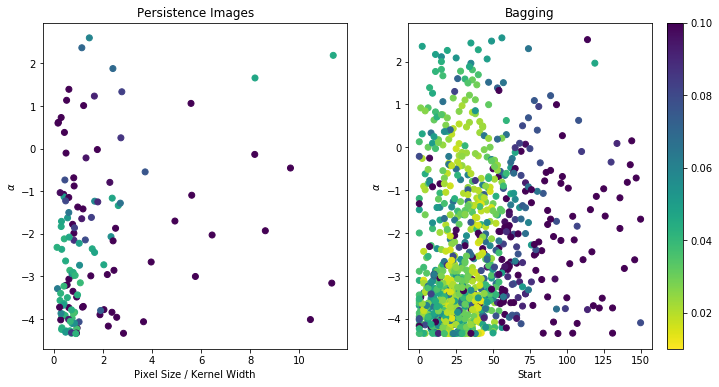

In [16]:
import scipy.io as sio

## Plot alpha vs pixel size

# Columns of loss, ridge alpha, pixel size, kernel width
YPI = []

# Columns of loss, ridge alpha, start, num_pairs, per_only
YBag = []

for i, f in enumerate(bayes_trials):
    y = [f['result']['loss'], np.log10(f['result']['params']['estimator_params']['kwargs']['ridge__alpha'])]
    dparams = f['result']['params']['dgm_vec_params']['kwargs']
    if 'num_pairs' in dparams:
        y.append(dparams['start'])
        y.append(dparams['num_pairs'])
        y.append(int(dparams['per_only']))
        YBag.append(y)
    else:
        y.append(dparams['pixel_size'])
        y.append(dparams['kernel_params']['sigma'])
        YPI.append(y)
YPI = np.array(YPI)
YBag = np.array(YBag)

sio.savemat("Full_Search.mat", {"best":0.012, "YPI":YPI, "YBag":YBag})
vmin = 0.01 #np.min(Y[:, 0])
vmax = 0.1 #p.max(Y[:, 0])


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(YPI[:, 2]/YPI[:, 3], YPI[:, 1], c=YPI[:, 0], cmap='viridis_r', vmin=vmin, vmax=vmax)
plt.xlabel("Pixel Size / Kernel Width")
plt.ylabel("$\\alpha$")
plt.title("Persistence Images")
plt.subplot(122)
plt.scatter(YBag[:, 2], YBag[:, 1], c=YBag[:, 0], cmap='viridis_r', vmin=vmin, vmax=vmax)
plt.xlabel("Start")
plt.ylabel("$\\alpha$")
plt.title("Bagging")
plt.colorbar()

## Grabbing And Sorting

In [ ]:
bone_df = get_bone_data_df()
dgm_df = bone_df[['dgm']]
target_df = bone_df['trabnum']
scorer = make_scorer(mean_squared_error)
max_evals = 495
cv=5

# precompute the persistence image region over the full dataset
birth_range = (0, 1)
pers_range = (0, 1)

pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])

param_space = {'estimator_params': 
                {
                'method': pipeline_ridge,
                'kwargs':  {
                            'ridge__normalize':False,
                            'ridge__fit_intercept':True,
                            'ridge__alpha':hp.loguniform('alphas', -10, 0)
                            }
                },
                'dgm_vec_params':
                {
                'method': vec_dgm_by_per,
                'kwargs': {
                             'start': hp.quniform('start', 0, 150, 1),
                             'num_pairs': hp.quniform('num_pairs', 1, 150, 1), 
                             'per_only': hp.choice('per_only', [True, False])
                            }
                }
            }


# ---------------------------------
# create the objective function to minimize, passing in all fixed arguments
objective = lambda params: cv_objective(params,
                                        dgm_df=dgm_df,
                                        target_df=target_df, 
                                        scorer=scorer,
                                        cv=cv,
                                        verbose=True)


bayes_trials_grabandsort = Trials()

# run the hyperparamter optimization
best_grabandsort = fmin(fn=objective, 
            space=param_space, 
            algo=tpe.suggest, 
            max_evals=max_evals, 
            trials=bayes_trials_grabandsort)